In [1]:
from arcgis.gis import GIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
# sign in to ArcGIS Online
gis = GIS("https://www.arcgis.com", "username", "password")

In [3]:
# Get Transit Alert Data
alert = gis.content.get('40dd0ecac4af411684e8c66cd5930ccb')

In [4]:
# Create feature layer
flayer = alert.layers[0]

# Create spatial dataframe object
sdf = pd.DataFrame.spatial.from_layer(flayer)
sdf.head()

C:\Users\miguelf.PARTNC\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\IPython\lib\pretty.py:402: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  return _repr_pprint(obj, self, cycle)
C:\Users\miguelf.PARTNC\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\pandas\io\formats\html.py:606: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  super().render()


,objectid,globalid,date_time,trip_start_time,status_of_bus,routes,delay_reason,delay_length,details,additional_comments,indicate_who_completed_the_surv,total_route_1_EAST,total_route_1_WEST,total_route_2_EAST,total_route_2_WEST,total_route_3_NORTH,total_route_3_SOUTH,total_route_4_EAST,total_route_4_WEST,total_route_5_EAST,total_route_5_WEST,total_route_6_NORTH,total_route_6_SOUTH,total_route_9_NORTH,total_route_9_SOUTH,total_route_10_NORTH,total_route_10_SOUTH,total_route_17_EAST,total_route_17_WEST,total_route_19,total_route_20,total_route_21,total_route_22,total_route_23,total_route_27,total_route_28_EAST,total_route_28_WEST,total_route_1,total_route_2,total_route_3,total_route_4,total_route_5,total_route_6,total_route_9,total_route_10,total_route_17,total_route_28,total_north_shuttle,total_south_shuttle,CreationDate,Creator,EditDate,Editor,time_of_submission,SHAPE
0,17,55fd774b-061f-407a-86ec-06484f508a59,2019-10-07 07:49:00,06:15,on_time,"route_1_EAST,route_2_WEST,route_3_NORTH",None,None,None,None,lisa,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,2019-10-07 10:30:31.388999939,,2019-10-07 10:30:31.388999939,,NaT,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ..."
1,18,c47e253e-6d4e-4e44-8f05-f4fe9b3c9eeb,2019-10-07 10:55:00,06:45,minor_delay_less_than_10_minute,"route_1_WEST,route_2_EAST,route_3_SOUTH,route_...",hold_for_connections,0_5_minutes,None,Route 1 within the 1/2 mile marker,lisa,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,2019-10-07 10:57:38.131999969,,2019-10-07 10:57:38.131999969,,NaT,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ..."
2,19,1f35df57-0cb5-4912-8621-3f1d7e65cda7,2019-10-07 10:55:00,07:15,minor_delay_less_than_10_minute,"route_1_EAST,route_2_EAST,route_3_NORTH",passenger_issue,0_5_minutes,None,Loading and Unloading Passengers,lisa,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,2019-10-07 11:20:04.377000093,,2019-10-07 11:20:04.377000093,,NaT,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ..."
3,20,0c02570b-2462-491b-840b-e5c954a4ce57,2019-10-07 10:55:00,07:45,minor_delay_less_than_10_minute,"route_2_WEST,route_3_NORTH",passenger_issue,0_5_minutes,None,Passenger loading and unloading,lisa,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2019-10-07 11:55:14.994999886,,2019-10-07 11:55:14.994999886,,NaT,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ..."
4,21,7771b629-9d7c-42ba-8c18-a7d1e5ec5694,2019-10-07 10:55:00,07:45,minor_delay_less_than_10_minute,route_1_EAST,traffic,6_10_minutes,None,delayed arriving to WSTA & unload & load pass...,lisa,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2019-10-07 11:57:01.615000010,,2019-10-07 11:57:01.615000010,,NaT,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ..."


In [5]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 55 columns):
objectid                           2179 non-null int64
globalid                           2179 non-null object
date_time                          139 non-null datetime64[ns]
trip_start_time                    2179 non-null object
status_of_bus                      2179 non-null object
routes                             2179 non-null object
delay_reason                       1509 non-null object
delay_length                       1509 non-null object
details                            29 non-null object
additional_comments                656 non-null object
indicate_who_completed_the_surv    2179 non-null object
total_route_1_EAST                 2179 non-null int64
total_route_1_WEST                 2179 non-null int64
total_route_2_EAST                 2179 non-null int64
total_route_2_WEST                 2179 non-null int64
total_route_3_NORTH                2179 non-null int64

In [6]:
# Create day_of_week column and populate with values from time_of_submission
sdf['day_of_week'] = sdf['time_of_submission'].dt.dayofweek

In [41]:
# Create dataframe with data from November 2019
nov = sdf[sdf['time_of_submission'] >= '2019-11-01']

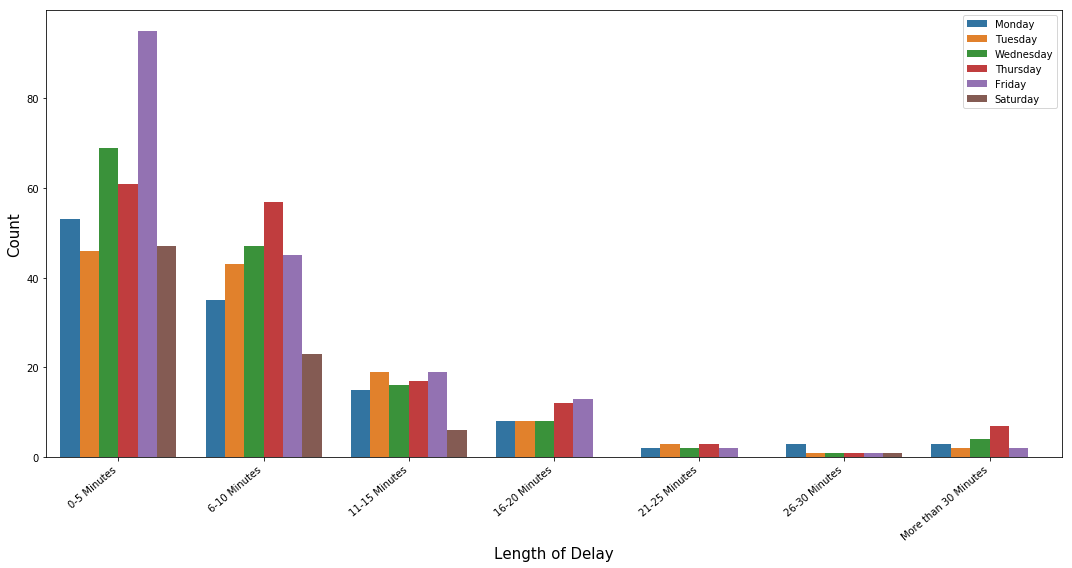

In [42]:
# Create plot looking at Length of Delay for November
plt.figure(figsize=(15,8))
ax = sns.countplot(x='delay_length',
                   data=nov,
                   hue='day_of_week',
                   order = ['0_5_minutes', '6_10_minutes', '11 - 15 Minutes', '16 - 20 Minutes', '21 - 25 Minutes', '26 - 30 Minutes', 'more_than_30_minutes'])

N = 7
ind = np.arange(N)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xticks(ind, ('0-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-25 Minutes', '26-30 Minutes', 'More than 30 Minutes'))
ax.set_xlabel('Length of Delay',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.tight_layout()
plt.show()

From the plot above, we can see that most of the longer delays are fairly uniform across the week days. The one exception is the 16-20 minute delays which have a slight increase on Thursday's and Friday's. The 0-5 Minute and 6-10 Minute delays occur much more frequently and we can see some pretty interesting patterns. What causes the spikes on Monday's, Tuesday's and Wednesday's for the 0-5 Minute delays? Maybe there is increased traffic on those days with part-time employees or students on the road which puts the buses just a few minutes behind and those 0-5 Minute delays are for holding the bus?

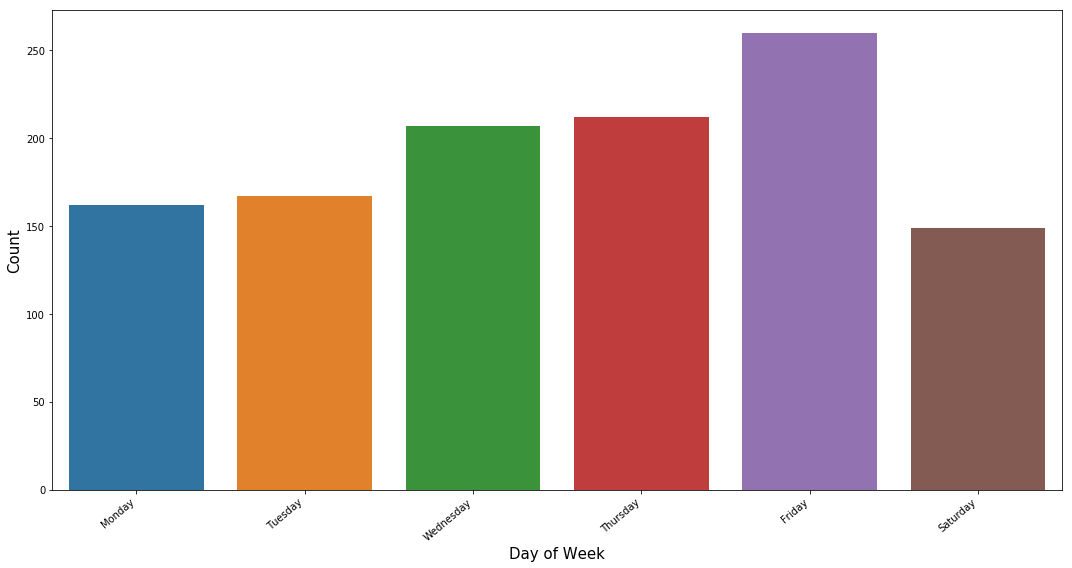

In [43]:
# Create plot displaying number of alerts by weekday
plt.figure(figsize=(15,8))
ax = sns.countplot(x='day_of_week', data=nov)

N = 6
ind = np.arange(N)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xticks(ind, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))
ax.set_xlabel('Day of Week',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

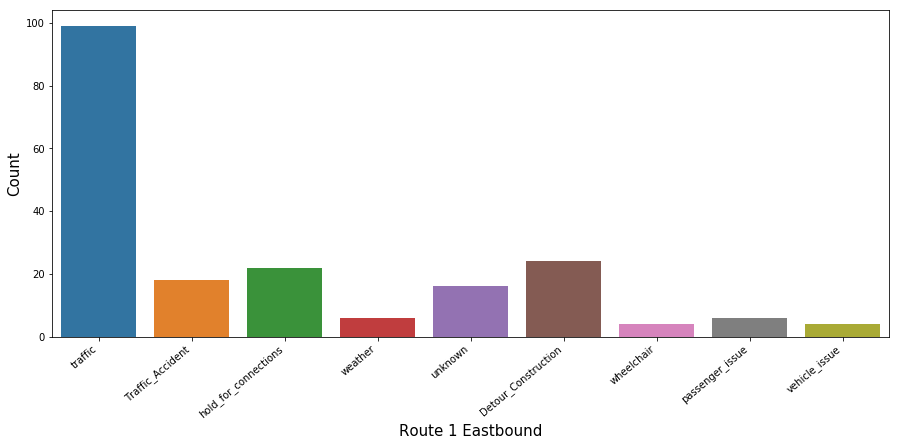

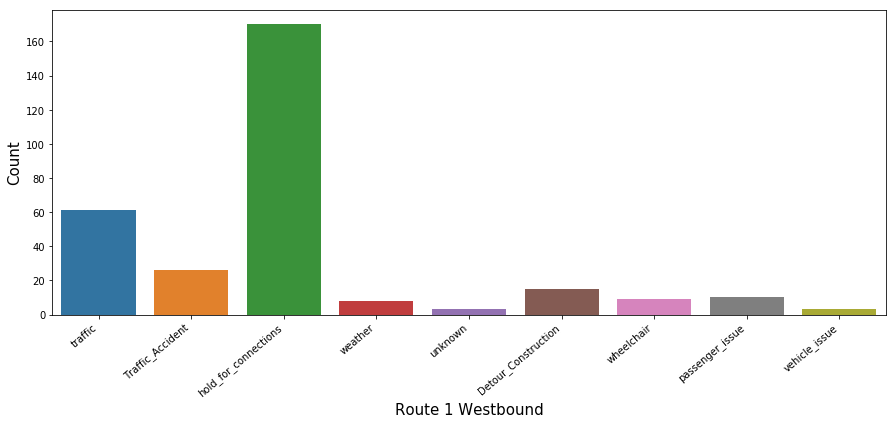

In [44]:
# Select Route 1 data
east1 = nov[nov['total_route_1_EAST'] == 1]
west1 = nov[nov['total_route_1_WEST'] == 1]

# Create plot for Route 1 Eastbound showing Reason for Delay
plt.figure(figsize=(15,6))
ax1 = sns.countplot(x = 'delay_reason',
                    data = east1,
                    order = ['traffic', 'Traffic_Accident', 'hold_for_connections', 'weather', 'unknown', 'Detour_Construction', 'wheelchair', 'passenger_issue', 'vehicle_issue'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Route 1 Eastbound',fontsize=15)
ax1.set_ylabel('Count',fontsize=15)

# Create plot for Route 1 Westbound showing Reason for Delay
plt.figure(figsize=(12.55,6))
ax2 = sns.countplot(x = 'delay_reason',
                    data = west1,
                    order = ['traffic', 'Traffic_Accident', 'hold_for_connections', 'weather', 'unknown', 'Detour_Construction', 'wheelchair', 'passenger_issue', 'vehicle_issue'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_xlabel('Route 1 Westbound',fontsize=15)
ax2.set_ylabel('Count',fontsize=15)

# Display the plots
plt.tight_layout()
plt.show()

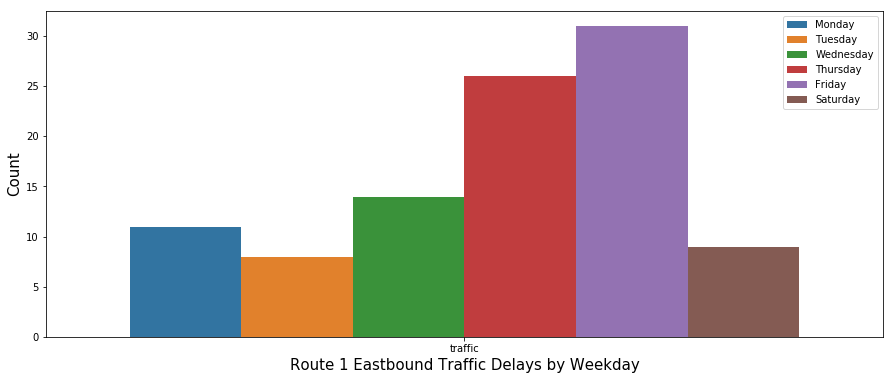

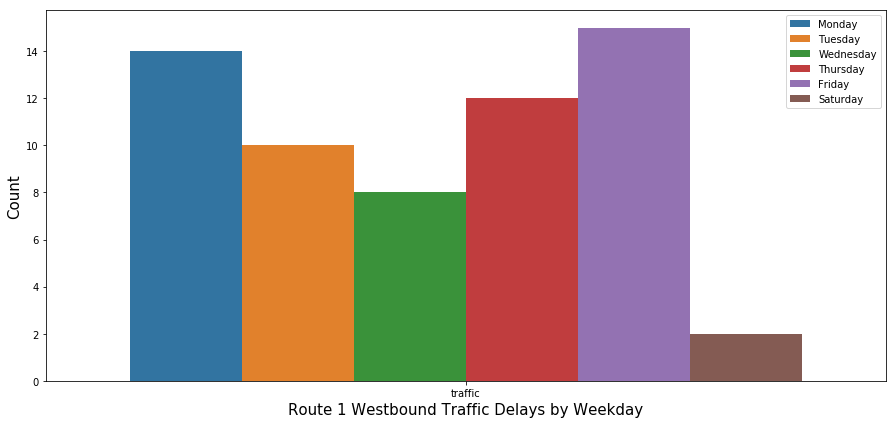

In [45]:
# Create new dataframes where the alert was caused by traffic
x1 = east1[east1['delay_reason'] == 'traffic']
x2 = west1[west1['delay_reason'] == 'traffic']

# Create plot for Eastbound and display by day of week
plt.figure(figsize=(15,6))
ax1 = sns.countplot(x = 'delay_reason',
                    data = x1,
                    hue = 'day_of_week')
ax1.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax1.set_xlabel('Route 1 Eastbound Traffic Delays by Weekday',fontsize=15)
ax1.set_ylabel('Count',fontsize=15)

# Create plot for Westbound and display by day of week
plt.figure(figsize=(12.55,6))
ax2 = sns.countplot(x = 'delay_reason',
                    data = x2,
                    hue = 'day_of_week')
ax2.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax2.set_xlabel('Route 1 Westbound Traffic Delays by Weekday',fontsize=15)
ax2.set_ylabel('Count',fontsize=15)

# Display the plots
plt.tight_layout()
plt.show()

These graphs display some very interesting results. Route 1 Eastbound is often delayed by traffic, especially on Thursday's and Friday's. The count of alerts for those two days is much higher than the days earlier in the week. Looking at Route 1 Westbound, we see a very different pattern. Monday is very close to Friday when it comes to number of alerts submitted. The counts for Thursday and Friday on the Westbound pattern are much lower than the Eastbound pattern. Something to consider when looking at this data is that for several weeks in November, Business 40 was down to one lane heading eastbound and this activity caused significant delays for all routes coming eastbound out of Winston-Salem. However, that does not explain why Thursday and Friday have more alerts posted. Anecdotally, traffic seems to be worse towards the end of the week. And while that may explain the eastbound alerts, how can we explain the westbound alerts where Monday's alerts for traffic are almost equal to those of Friday?

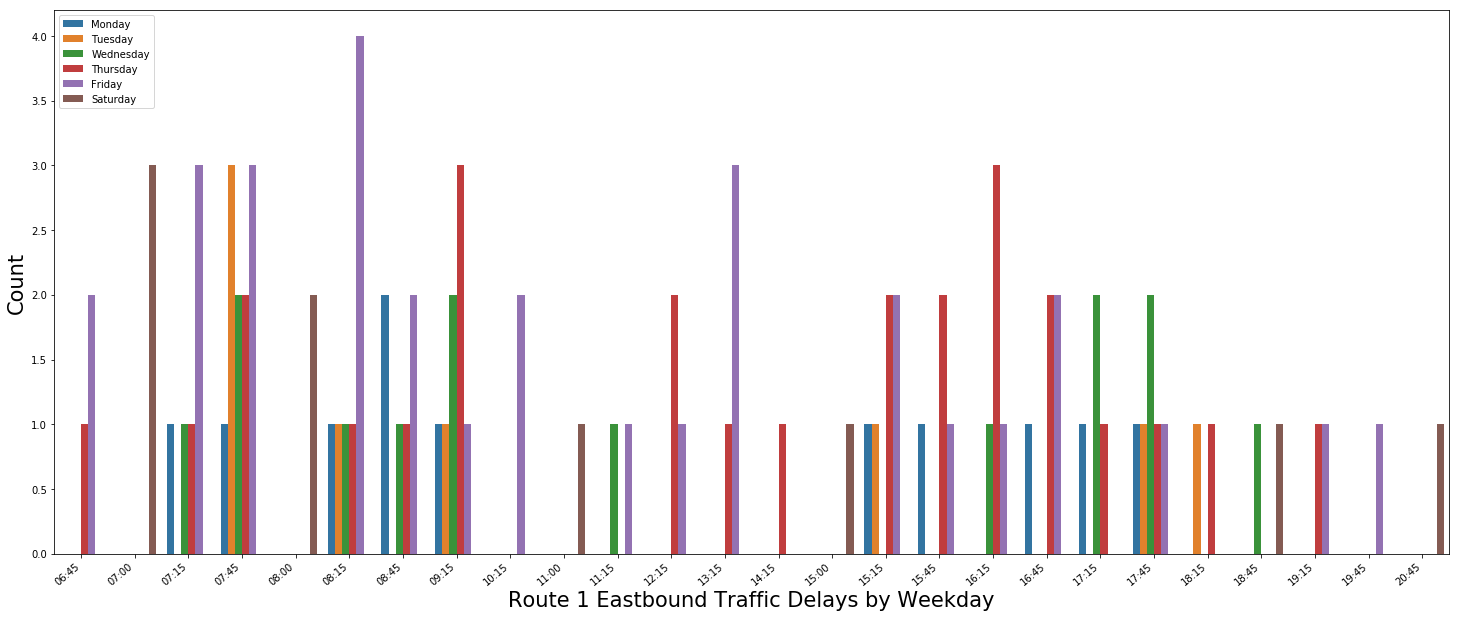

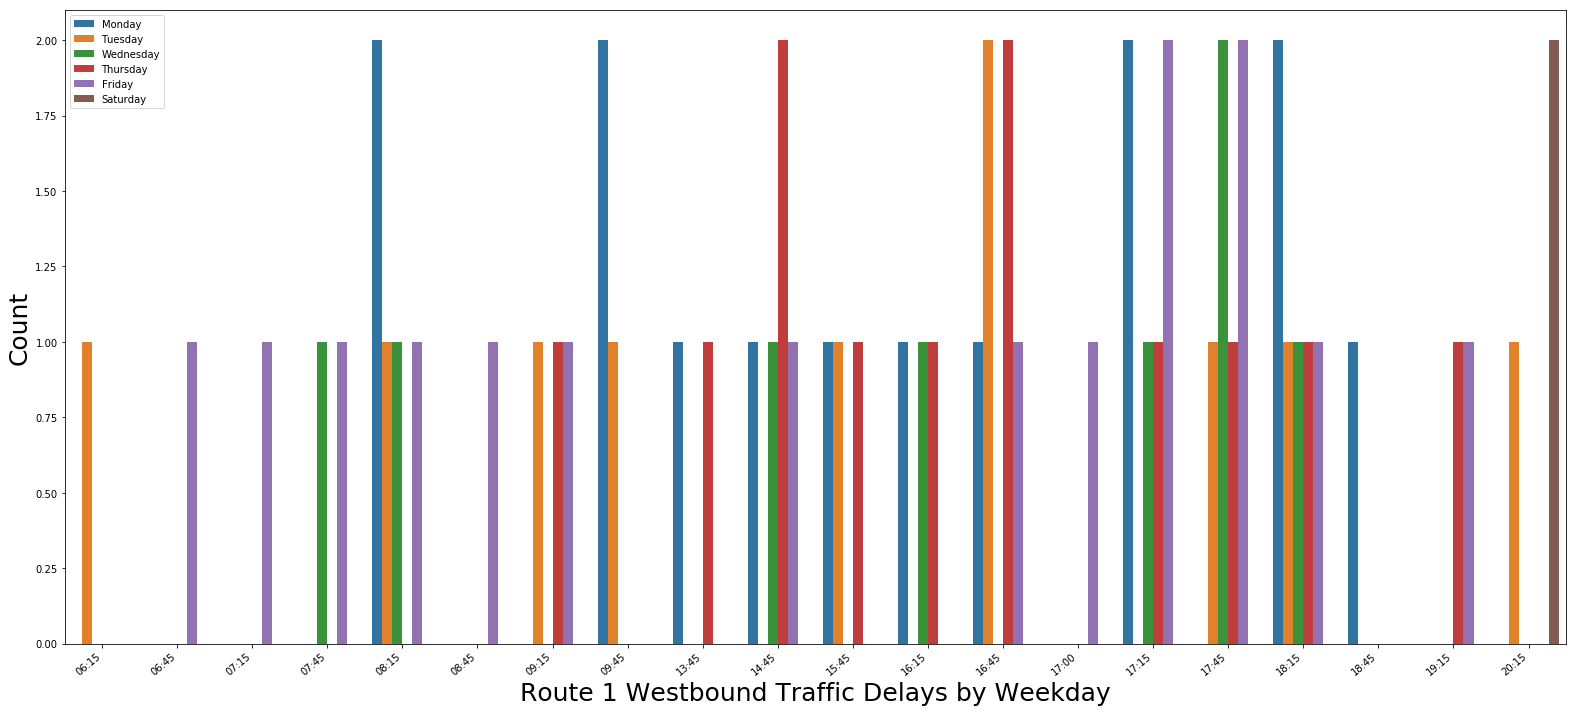

In [46]:
plt.figure(figsize=(25,10))
ax1 = sns.countplot(x = 'trip_start_time',
                    data = x1.sort_values('trip_start_time'),
                    hue = 'day_of_week')
ax1.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Route 1 Eastbound Traffic Delays by Weekday',fontsize=21)
ax1.set_ylabel('Count',fontsize=21)

plt.figure(figsize=(22,10))
ax2 = sns.countplot(x = 'trip_start_time',
                    data = x2.sort_values('trip_start_time'),
                    hue = 'day_of_week')
ax2.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],loc=2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_xlabel('Route 1 Westbound Traffic Delays by Weekday',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

# Display the plots
plt.tight_layout()
plt.show()

As of this analysis, there has been 3 Monday's, 3 Tuesday's, 3 Wednesday's, 3 Thursday's, 4 Friday's, and 4 Saturday's. Looking at the Route 1 Eastbound chart, there has been 4 delays on Friday at the 8:15 AM trip. There has also been 3 delays at the 7:15 AM trip, the 7:45 AM trip, and the 1:15 PM trip on Friday's. There has also been 3 delays on Thursday's for the 9:15 AM trip, and the 4:15 PM trip. Let's isolate those trips and see how long traffic delayed them.

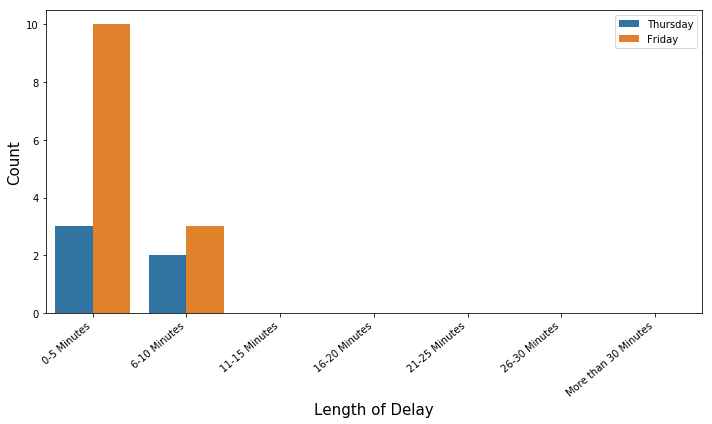

In [49]:
th = x1.loc[(x1['day_of_week'] == 3) & ((x1['trip_start_time'] == '09:15') | (x1['trip_start_time'] == '16:45'))]
f = x1.loc[(x1['day_of_week'] == 4) & ((x1['trip_start_time'] == '07:15') | (x1['trip_start_time'] == '07:45') | (x1['trip_start_time'] == '08:15') | (x1['trip_start_time'] == '13:15'))]

delays = pd.concat([th, f])

# Create plot
plt.figure(figsize=(10,6))
ax = sns.countplot(x='delay_length',
                   data=delays,
                   hue='day_of_week',
                   order = ['0_5_minutes', '6_10_minutes', '11 - 15 Minutes', '16 - 20 Minutes', '21 - 25 Minutes', '26 - 30 Minutes', 'more_than_30_minutes'])

N = 7
ind = np.arange(N)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xticks(ind, ('0-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-25 Minutes', '26-30 Minutes', 'More than 30 Minutes'))
ax.set_xlabel('Length of Delay',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.legend(['Thursday', 'Friday'], loc = 1)
plt.tight_layout()
plt.show()

We can see that while those delays seem to occur every Thursday or Friday, they seem to be relatively minor with the majority being 0-5 minutes. From one of the earlier charts, we also saw that Route 1 Westbound is often delayed because of holding for connections. Let's investigate.

In [50]:
# Select all records for Route 1 Westbound that were delayed because of holding for connections
x3 = west1[west1['delay_reason'] == 'hold_for_connections']

In [52]:
print('There are {} records for Route 1 Westbound being delayed because of holding for connections' .format(len(x3)))

There are 170 records for Route 1 Westbound being delayed because of holding for connections


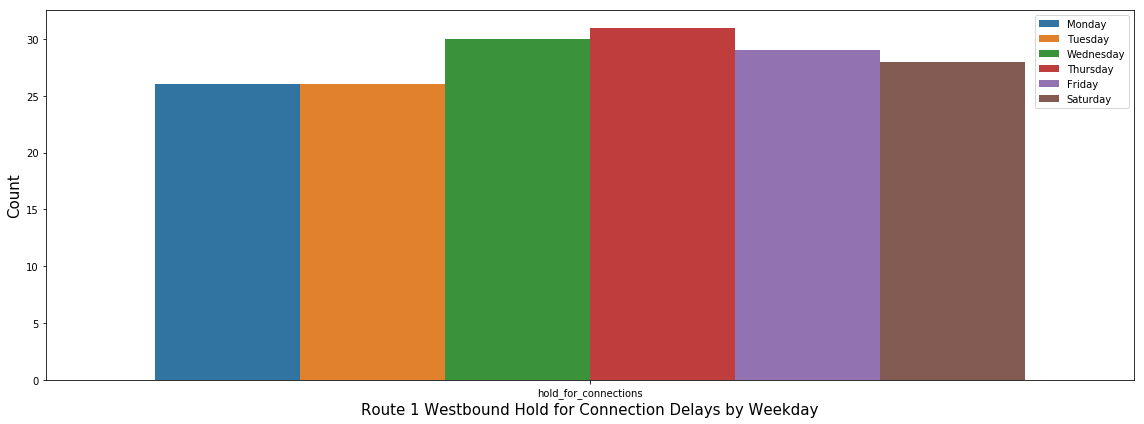

In [58]:
# Create plot for Westbound and display by day of week
plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'delay_reason',
                    data = x3,
                    hue = 'day_of_week')
ax.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax.set_xlabel('Route 1 Westbound Hold for Connection Delays by Weekday',fontsize=15)
ax.set_ylabel('Count',fontsize=15)

# Display the plots
plt.tight_layout()
plt.show()

We can see that the pattern is fairly uniform and delays because of holding for connections occurs regularly. Something surprising is the number of delays on Saturday. There has to be something causing the delay for Route 1 Westbound on Saturday's. Now let's look and see if the delays occur around certain trip times.

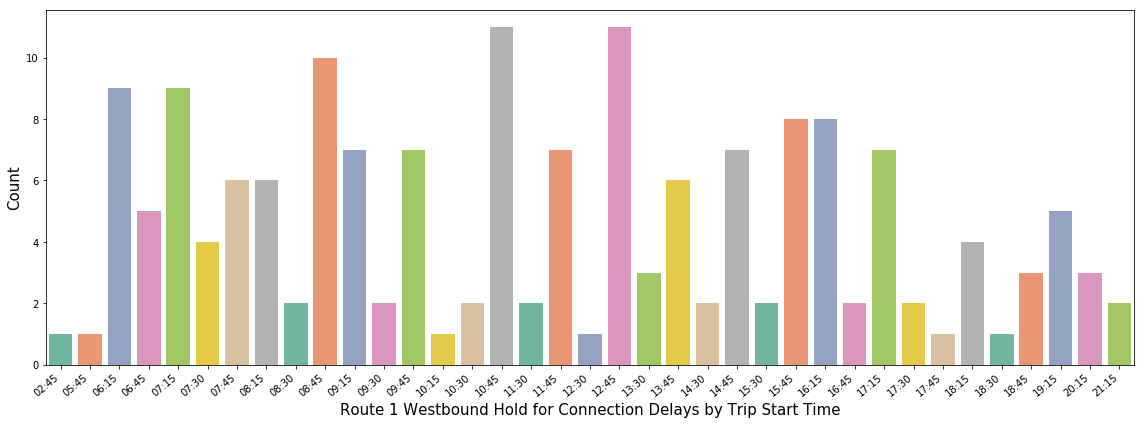

In [62]:
# Create plot for Westbound and display by trip start time
plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'trip_start_time',data = x3.sort_values('trip_start_time'), palette = 'Set2')
ax.set_xlabel('Route 1 Westbound Hold for Connection Delays by Trip Start Time',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Display the plots
plt.tight_layout()
plt.show()

There seems to be no real pattern to the delays when looking by the trip start time. Two things do stand out to me though. The first is that the very first Trip Start Time is 2:45 AM. While steps have been taken to ensure data integrity, it's important to remember that data can contain errors and one of the best ways to locate those errors is to visualize the data. The second bit that stands out to me is that the two trips with the most occurances are the 10:45 AM and 12:45 PM trips. During this part of the day the bus is on hourly service and it has a lot of ground to cover in that hour. What this shows me is that during this period, Route 1 as well as the other routes that operate out of the CTC with the same schedule are having trouble staying on schedule and this causes the buses to be held for connections.